# Movimento de um projétil com resistência do ar quadrática

Gessé de Castro Adam e Clóvis Caetano

Última edição: 26 de junho de 2024

## Teoria

Se a resistência do ar for proporcional ao quadrado do módulo da velocidade do projétil, a força resultante será dada por:

$$
\vec{F}_{\text{res}} = -mg\hat{y} - \frac{1}{2}C\rho Av\vec{v},
$$

onde $C$ é o coeficiente de arrasto, $\rho$ a densidade do ar e $A$ a área de seção transversal do projétil perpendicular à direção do movimento.

Definindo $q = {\displaystyle\frac{C\rho A}{2m}}$, as componentes da aceleração do projétil podem ser escritas como:

$$
\left\{
\begin{align*}
a_x&=-q(v_x^2+v_y^2)^{1/2}v_x\\
a_y&=-g-q(v_x^2+v_y^2)^{1/2}v_y.
\end{align*}
\right.
$$

Neste caso as equações do movimento não podem ser resolvidas analiticamente. 

Existem soluções anlíticas aproximadas para a trajetória. Uma delas é a seguinte:

$$
y = x\left(\frac{v_{y_0}}{v_{x_0}}+\frac{g}{2qv_{x_0}^2}\right) + \frac{g}{q^2}\left(\frac{1-e^{2qx}}{4v_{x_0}^2}\right).
$$

Esta aproximação é válida somente para tempos curtos ou ângulos iniciais pequenos.

## Implementação

In [1]:
# Carregando bibliotecas que serão usadas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
def aceleracao(x, y, vx, vy):
    """
    Função que calcula a aceleração do projétil.
    """
    v = np.sqrt(vx**2+vy**2)
    ax = -q*v*vx
    ay = -g-q*v*vy
    return ax, ay

In [3]:
def func_analitica(x):
    """
    Função que calcula a trajetória analítica (aproximada) do projétil.
    """
    vt = np.sqrt(g/q)
    T = vt/g  
    E = x*(vy0/vx0 + g/(2*q*vx0**2))
    F = g/q**2*(1-np.exp(2*q*x))/(4*vx0**2)
    return y0 + E + F

In [4]:
# Métodos numéricos

def euler(x, y, vx, vy):
    """
    Atualiza a posição e a velocidade do projétil com o método de Euler
    """
    ax, ay = aceleracao(x, y, vx, vy)
    vx_novo = vx + ax*dt 
    vy_novo = vy + ay*dt
    x_novo = x + vx*dt
    y_novo = y + vy*dt
    return x_novo, y_novo, vx_novo, vy_novo

def euler_cromer(x, y, vx, vy):
    """
    Atualiza a posição e a velocidade do projétil com o método de Euler-Cromer.
    """
    ax, ay = aceleracao(x, y, vx, vy)
    vx_novo = vx + ax*dt 
    vy_novo = vy + ay*dt
    x_novo = x + vx_novo*dt
    y_novo = y + vy_novo*dt
    return x_novo, y_novo, vx_novo, vy_novo

def heun(x, y, vx, vy):
    """
    Atualiza a posição e a velocidade do projétil com o método de Heun.
    """
    ax1, ay1 = aceleracao(x, y, vx, vy)
    vx1 = vx + ax1*dt
    vy1 = vy + ay1*dt
    x1 = x + vx*dt
    y1 = y + vy*dt
    ax2, ay2 = aceleracao(x1, y1, vx1, vy1)
    vx2 = vx + ax2*dt
    vy2 = vy + ay2*dt
    x2 = x + vx1*dt
    y2 = y + vy1*dt
    x_novo = (x1 + x2)/2
    y_novo = (y1 + y2)/2
    vx_novo = (vx1 + vx2)/2
    vy_novo = (vy1 + vy2)/2
    return x_novo, y_novo, vx_novo, vy_novo

def runge_kutta(x, y, vx, vy):
    """
    Atualiza a posição e a velocidade do projétil com o método de 
    Runge-Kutta de 4ª ordem.
    """
    ax1, ay1 = aceleracao(x, y, vx, vy)  
    k1vx = ax1*dt
    k1vy = ay1*dt
    k1x = vx*dt
    k1y = vy*dt
    ax2, ay2 = aceleracao(x+k1x/2, y+k1y/2, vx+k1vx/2, vy+k1vy/2)  
    k2vx = ax2*dt
    k2vy = ay2*dt
    k2x = (vx+k1vx/2)*dt
    k2y = (vy+k1vy/2)*dt
    ax3, ay3 = aceleracao(x+k2x/2, y+k2y/2, vx+k2vx/2, vy+k2vy/2)  
    k3vx = ax3*dt
    k3vy = ay3*dt
    k3x = (vx+k2vx/2)*dt
    k3y = (vy+k2vy/2)*dt
    ax4, ay4 = aceleracao(x+k3x, y+k3y, vx+k3vx, vy+k3vy)  
    k4vx = ax4*dt
    k4vy = ay4*dt
    k4x = (vx+k3vx)*dt
    k4y = (vy+k3vy)*dt
    x_novo = x + 1/6*(k1x + 2*k2x + 2*k3x + k4x) 
    y_novo = y + 1/6*(k1y + 2*k2y + 2*k3y + k4y)
    vx_novo = vx + 1/6*(k1vx + 2*k2vx + 2*k3vx + k4vx)
    vy_novo = vy + 1/6*(k1vy + 2*k2vy + 2*k3vy + k4vy)
    return x_novo, y_novo, vx_novo, vy_novo

In [6]:
def trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min):
    """
    Função para calcular as coordenadas e as componentes da velocidade do projétil
    """
    # Usando as condições iniciais
    t = t0
    x = x0
    y = y0
    vx = vx0
    vy = vy0

    # Criando listas para armazenar os valores calculados
    t_salvo = np.array([t])
    x_salvo = np.array([x])
    y_salvo = np.array([y])
    vx_salvo = np.array([vx])
    vy_salvo = np.array([vy])

    # Atualizando os valores das variáveis
    while t < t_max:
        t = t + dt
        x, y, vx, vy = metodo(x, y, vx, vy)
        t_salvo = np.append(t_salvo, t)
        x_salvo = np.append(x_salvo, x)
        y_salvo = np.append(y_salvo, y)
        vx_salvo = np.append(vx_salvo, vx)
        vy_salvo = np.append(vy_salvo, vy)  
        if y < y_min:
            break
    
    return t_salvo, x_salvo, y_salvo, vx_salvo, vy_salvo

In [7]:
# Constantes físicas
g = 9.81 # Aceleração da gravidade em m/s^2

In [9]:
# Condições iniciais
t0 = 0
x0 = 0
y0 = 0
v0 = 1640
theta0 = 45
theta0_rad = np.deg2rad(theta0)
vx0 = v0*np.cos(theta0_rad)
vy0 = v0*np.sin(theta0_rad)

# Condições de parada
t_max = 10*60
y_min = 0 

# Incremento no tempo
dt = 5

# Método numérico
metodo = heun

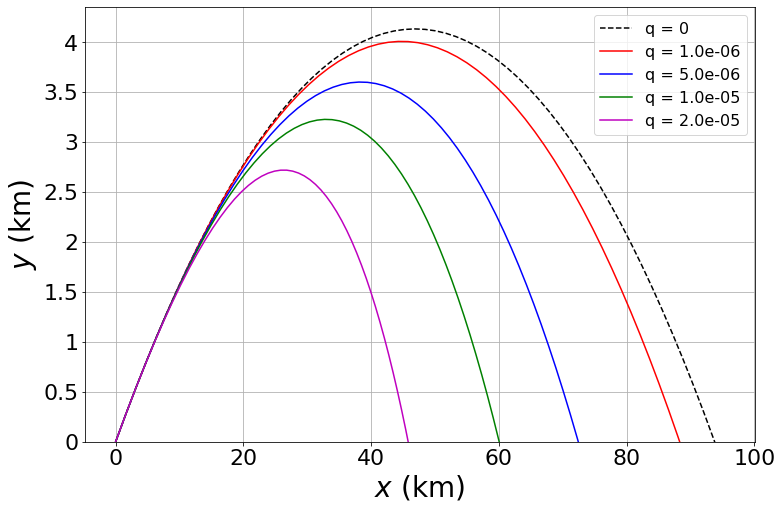

In [15]:
# Desenhando a trajetória do projétil para diferentes valores de q
fig,ax = plt.subplots()
ax.figure.set_size_inches(12, 8)

q = 0
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, 'k--', label='q = 0')

q = 1e-6
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, 'r-', label='q = %.1e'%q)

q = 5e-6
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, 'b-', label='q = %.1e'%q)

q = 1e-5
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, 'g-', label='q = %.1e'%q)

q = 2e-5
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, 'm-', label='q = %.1e'%q)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e3)))
ax.set_xlabel('$x$ (km)', size=28)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/1e3)))
ax.set_ylabel('$y$ (km)', size=28)
ax.set_ylim(bottom=0)
ax.tick_params(labelsize=22)
ax.legend(fontsize=16)
ax.grid()
fig.savefig("Resultado3.png", dpi=300, facecolor='white', bbox_inches='tight')

Notemos que as formas das trajetórias são semelhante ao caso de resistência do ar linear. No entanto, verifica-se que, como esperado, o efeito da força de resistência do ar quadrática é muito mais relevando do que a força de resistência linear. Note que neste gráfico foram usados valores de $q$ muito menores que os de $k$ do último notebook.

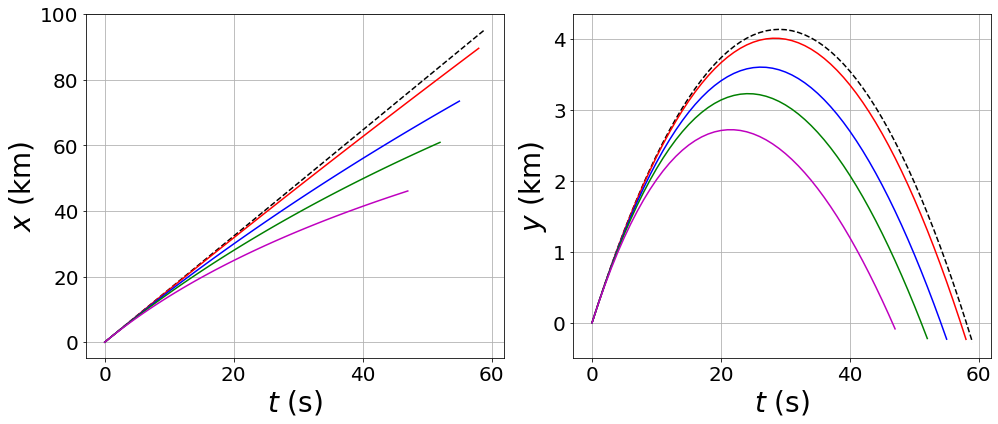

In [16]:
# Gráficos das coordenadas do projétil em função do tempo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

dt = 1

q = 0
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax1.plot(t, x, 'k--', label='q = 0')
ax2.plot(t, y, 'k--', label='q = 0')

q = 1e-6
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax1.plot(t, x, 'r-', label='q = %.1E'%q)
ax2.plot(t, y, 'r-', label='q = %.1E'%q)

q = 5e-6
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax1.plot(t, x, 'b-', label='q = %.1E'%q)
ax2.plot(t, y, 'b-', label='q = %.1E'%q)

q = 1e-5
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax1.plot(t, x, 'g-', label='q = %.1E'%q)
ax2.plot(t, y, 'g-', label='q = %.1E'%q)

q = 2e-5
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax1.plot(t, x, 'm-', label='q = %.1E'%q)
ax2.plot(t, y, 'm-', label='q = %.1E'%q)

ax1.set_xlabel('$t$ (s)', size=28)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/1e3)))
ax1.set_ylabel('$x$ (km)', size=28)

ax2.set_xlabel('$t$ (s)', size=28)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/1e3)))
ax2.set_ylabel('$y$ (km)', size=28)

ax1.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
ax1.grid()
ax2.grid()
fig.tight_layout()
fig.savefig("Resultado4a.png", dpi=300, facecolor='white', bbox_inches='tight')

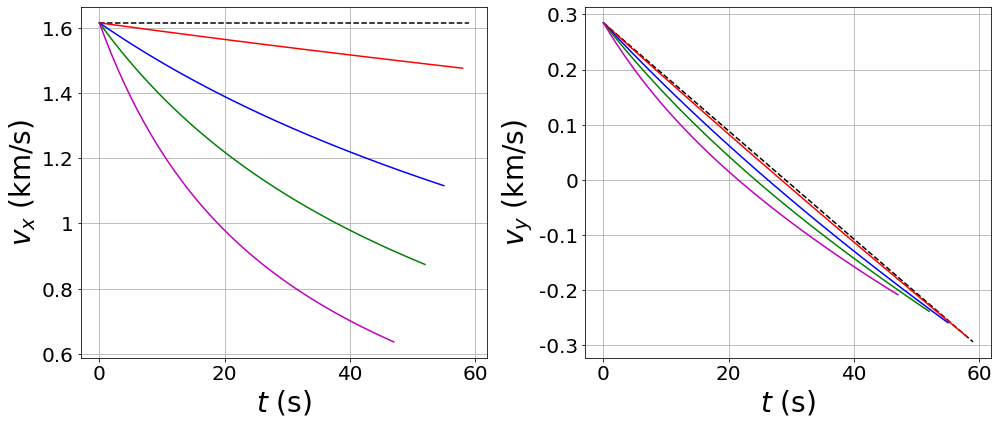

In [17]:
# Gráficos das componentes da velocidade do projétil em função do tempo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

dt = 1

q = 0
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax1.plot(t, vx, 'k--', label='q = 0')
ax2.plot(t, vy, 'k--', label='q = 0')

q = 1e-6
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax1.plot(t, vx, 'r-', label='q = %.1E'%q)
ax2.plot(t, vy, 'r-', label='q = %.1E'%q)

q = 5e-6
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax1.plot(t, vx, 'b-', label='q = %.1E'%q)
ax2.plot(t, vy, 'b-', label='q = %.1E'%q)

q = 1e-5
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax1.plot(t, vx, 'g-', label='q = %.1E'%q)
ax2.plot(t, vy, 'g-', label='q = %.1E'%q)

q = 2e-5
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax1.plot(t, vx, 'm-', label='q = %.1E'%q)
ax2.plot(t, vy, 'm-', label='q = %.1E'%q)

ax1.set_xlabel('$t$ (s)', size=28)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/1e3)))
ax1.set_ylabel('$v_x$ (km/s)', size=28)

ax2.set_xlabel('$t$ (s)', size=28)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/1e3)))
ax2.set_ylabel('$v_y$ (km/s)', size=28)

ax1.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)
#ax1.legend(fontsize=16, loc='best')
#ax2.legend(fontsize=16)
ax1.grid()
ax2.grid()
fig.tight_layout()
fig.savefig("Resultado4b.png", dpi=300, facecolor='white', bbox_inches='tight')

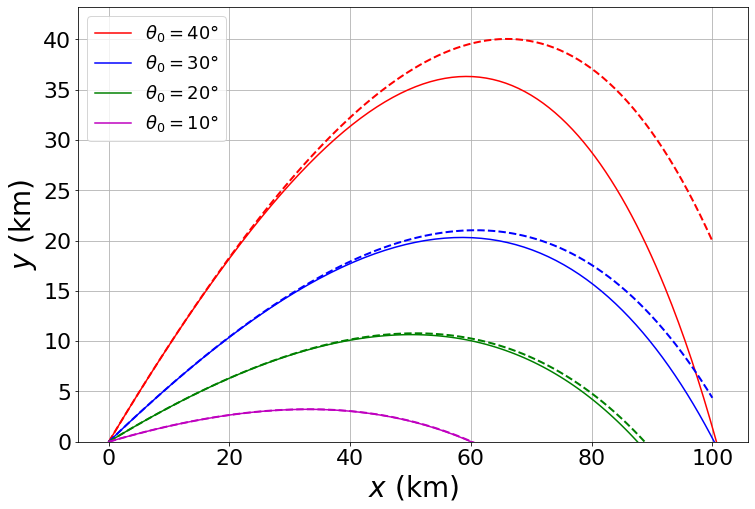

In [19]:
# Fazendo o gráfico da trajetória para diferentes ângulos (linhas cheias)
# e comparando com a trajetória analítica aproximada (linhas tracejadas)
fig,ax = plt.subplots()
ax.figure.set_size_inches(12, 8)

dt = 1
q = 1e-5

theta0 = 45
theta0_rad = np.deg2rad(theta0)
vx0 = v0*np.cos(theta0_rad)
vy0 = v0*np.sin(theta0_rad)
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, 'r-', label=r'$\theta_0 = 40\degree$')
x = np.linspace(x0, 100000, 100)
y = func_analitica(x)
ax.plot(x, y, 'r--', linewidth=2)

theta0 = 30
theta0_rad = np.deg2rad(theta0)
vx0 = v0*np.cos(theta0_rad)
vy0 = v0*np.sin(theta0_rad)
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, 'b-', label=r'$\theta_0 = 30\degree$')
x = np.linspace(x0, 100000, 100)
y = func_analitica(x)
ax.plot(x, y, 'b--', linewidth=2)

theta0 = 20
theta0_rad = np.deg2rad(theta0)
vx0 = v0*np.cos(theta0_rad)
vy0 = v0*np.sin(theta0_rad)
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, 'g-', label=r'$\theta_0 = 20\degree$')
x = np.linspace(x0, 100000, 100)
y = func_analitica(x)
ax.plot(x, y, 'g--', linewidth=2)

theta0 = 10
theta0_rad = np.deg2rad(theta0)
vx0 = v0*np.cos(theta0_rad)
vy0 = v0*np.sin(theta0_rad)
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, 'm-', label=r'$\theta_0 = 10\degree$')
x = np.linspace(x0, 100000, 100)
y = func_analitica(x)
ax.plot(x, y, 'm--', linewidth=2)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e3)))
ax.set_xlabel('$x$ (km)', size=28)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/1e3)))
ax.set_ylabel('$y$ (km)', size=28)
ax.set_ylim(bottom=0)
ax.tick_params(labelsize=22)
ax.legend(fontsize=18)
ax.grid()
fig.savefig("Resultado5.png", dpi=300, facecolor='white', bbox_inches='tight')

Como previsto, a função analítica aproximada fornece bons resultados para valores pequenos de tempo. Para valores grandes do tempo não há concordância com os resultados numéricos, exceto quando o ângulo de disparo é pequeno.